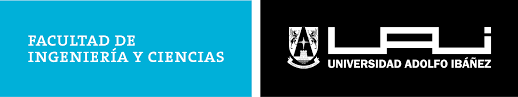


**Fundamentos de ciencias de datos,   Sección 3,   2022-2.**


**Profesora:   Carolina Lagos Campos.**


**Ayudante:   Bruno Reyes Sánchez.**

##**Tópicos**

 - Merge
 - Limpieza

**Resumen**

In [ ]:
"""pd.read_csv('nombre_tabla_csv.csv', encoding= ' ', sep= ' ')"""


#encoding = latin-1 , utf-8
#sep = , ; | 

"pd.read_csv('nombre_tabla_csv.csv', encoding= ' ', sep= ' ')"

In [ ]:
"""pd.DataFrame(data)"""

'pd.DataFrame(data)'

In [ ]:
"""df.rename(columns = {'columna_vieja': 'columna_nueva'}, inplace = False)"""

"df.rename(columns = {'columna_vieja': 'columna_nueva'}, inplace = False)"

In [ ]:
"""df.groupby(df['columna_para_agrupar'])['columna_operar'].count()"""

# .count() => Contar caracteres
# .sum() => Sumar numeros (enteros y decimales)
# .mean() => Promedio

"df.groupby(df['columna_para_agrupar'])['columna_operar'].count()"

In [ ]:
"""df.sort_values('columna_considerar', ascending=False)"""

#False => Mayor a menor
#True => Menor a mayor

"df.sort_values('columna_considerar', ascending=False)"

## **Merge**

Recordando la funcion ``merge`` de pandas, sirve para unir dos bases de datos(DataFrames). 

``pd.merge(df1,df2)``

donde ``df1`` y ``df2`` representan al primer y segundo dataset respectivamente.

En si ``merge`` es de forma "inteligente" de unir nuestros datos, ya que usa una columna en comun como base para unir, así cada fila queda emparejada con su par.

In [ ]:
"""df_merge = df_izq.merge(df_der, left_on="columna_similar_izquierda", right_on="columna_similar_derecha")"""

'df_merge = df_izq.merge(df_der, left_on="columna_similar_izquierda", right_on="columna_similar_derecha")'

In [ ]:
#Modulos necesarios

import pandas as pd
import numpy as np

In [ ]:
#Lectura de los datos

df_cod = pd.read_csv("codigos.csv", sep=";")
df_pre = pd.read_csv("presupuesto_2019.csv", sep=";")

In [ ]:
#Visualizacion de los datos (DataFrames)

# df_cod
# df_pre

In [ ]:
#Una los datos mediante un merge

df_merge = df_pre.merge(df_cod, left_on="CODIGO", right_on="Código Comuna 2018")
df_merge

,CODIGO,MUNICIPIO,PRESUPUESTO,Código Región,Nombre Región,Abreviatura Región,Código Provincia,Nombre Provincia,Código Comuna 2018,Nombre Comuna
0,1101,IQUIQUE,59072234,1,Tarapacá,TPCA,11,Iquique,1101,Iquique
1,1107,ALTO HOSPICIO,13984411,1,Tarapacá,TPCA,11,Iquique,1107,Alto Hospicio
2,1401,POZO ALMONTE,7613962,1,Tarapacá,TPCA,14,Tamarugal,1401,Pozo Almonte
3,1402,CAMIÑA,1584008,1,Tarapacá,TPCA,14,Tamarugal,1402,Camiña
4,1403,COLCHANE,2500000,1,Tarapacá,TPCA,14,Tamarugal,1403,Colchane
...,...,...,...,...,...,...,...,...,...,...
340,16301,SAN CARLOS,10459691,16,Ñuble,NUBLE,163,Punilla,16301,San Carlos
341,16302,COIHUECO,5001190,16,Ñuble,NUBLE,163,Punilla,16302,Coihueco
342,16303,ÑIQUÉN,3386698,16,Ñuble,NUBLE,163,Punilla,16303,Ñiquén
343,16304,SAN FABIÁN,1798500,16,Ñuble,NUBLE,163,Punilla,16304,San Fabián


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CODIGO              345 non-null    int64 
 1   MUNICIPIO           345 non-null    object
 2   PRESUPUESTO         345 non-null    object
 3   Código Región       345 non-null    int64 
 4   Nombre Región       345 non-null    object
 5   Abreviatura Región  345 non-null    object
 6   Código Provincia    345 non-null    int64 
 7   Nombre Provincia    345 non-null    object
 8   Código Comuna 2018  345 non-null    int64 
 9   Nombre Comuna       345 non-null    object
dtypes: int64(4), object(6)
memory usage: 29.6+ KB


#Limpieza de datos

**Sin la limpieza, es probable que los resultados de los análisis estén distorsionados.**

In [ ]:
#Verificamos la excistencia de datos nulos

print(df_merge.isnull().sum()) # .isnull() verifica la existencia de algún dato nulo.

CODIGO                0
MUNICIPIO             0
PRESUPUESTO           0
Código Región         0
Nombre Región         0
Abreviatura Región    0
Código Provincia      0
Nombre Provincia      0
Código Comuna 2018    0
Nombre Comuna         0
dtype: int64


In [ ]:
#Para limpiar los datos 

"""df_merge = df_merge.dropna()""" #Con .dropna() limpiamos los datos nulos, pero como no hay en este caso no será necesario implementarlo.


'df_merge = df_merge.dropna()'

In [ ]:
#Verificamos la excistencia de datos duplicados

print(df_merge.loc[df_merge.duplicated()].count()) # .duplicated() verifica la existencia de algún dato duplicado.

CODIGO                0
MUNICIPIO             0
PRESUPUESTO           0
Código Región         0
Nombre Región         0
Abreviatura Región    0
Código Provincia      0
Nombre Provincia      0
Código Comuna 2018    0
Nombre Comuna         0
dtype: int64


In [ ]:
#Limpieza de datos duplicados

"""df_merge.drop_duplicates(inplace=True)""" #De esta forma se limpiarian los datos duplicados, pero como no hay en este caso no sera necesario.

'df_merge.drop_duplicates(inplace=True)'

#Ejercicios


1.- A base del DataFrame hecho, extraiga la columna "MUNICIPIO" y	"PRESUPUESTO".

In [ ]:
df_extrac = df_merge[["MUNICIPIO" , "PRESUPUESTO"]]
df_extrac

,MUNICIPIO,PRESUPUESTO
0,IQUIQUE,59072234
1,ALTO HOSPICIO,13984411
2,POZO ALMONTE,7613962
3,CAMIÑA,1584008
4,COLCHANE,2500000
...,...,...
340,SAN CARLOS,10459691
341,COIHUECO,5001190
342,ÑIQUÉN,3386698
343,SAN FABIÁN,1798500


2.- Analice si los datos estan bien.

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CODIGO              345 non-null    int64 
 1   MUNICIPIO           345 non-null    object
 2   PRESUPUESTO         345 non-null    int64 
 3   Código Región       345 non-null    int64 
 4   Nombre Región       345 non-null    object
 5   Abreviatura Región  345 non-null    object
 6   Código Provincia    345 non-null    int64 
 7   Nombre Provincia    345 non-null    object
 8   Código Comuna 2018  345 non-null    int64 
 9   Nombre Comuna       345 non-null    object
dtypes: int64(5), object(5)
memory usage: 29.6+ KB


In [ ]:
pd.to_numeric(df_merge['PRESUPUESTO'])

ValueError: ignored

In [ ]:
df_merge = df_merge.replace(to_replace="No Recepcionado", value = "0")   # Acá se cambia No Recepcionado por 0


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CODIGO              345 non-null    int64 
 1   MUNICIPIO           345 non-null    object
 2   PRESUPUESTO         345 non-null    object
 3   Código Región       345 non-null    int64 
 4   Nombre Región       345 non-null    object
 5   Abreviatura Región  345 non-null    object
 6   Código Provincia    345 non-null    int64 
 7   Nombre Provincia    345 non-null    object
 8   Código Comuna 2018  345 non-null    int64 
 9   Nombre Comuna       345 non-null    object
dtypes: int64(4), object(6)
memory usage: 29.6+ KB


In [ ]:
#pd.to_numeric(df_merge['PRESUPUESTO'])
df_merge['PRESUPUESTO'] = pd.DataFrame(pd.to_numeric(df_merge['PRESUPUESTO']))
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CODIGO              345 non-null    int64 
 1   MUNICIPIO           345 non-null    object
 2   PRESUPUESTO         345 non-null    int64 
 3   Código Región       345 non-null    int64 
 4   Nombre Región       345 non-null    object
 5   Abreviatura Región  345 non-null    object
 6   Código Provincia    345 non-null    int64 
 7   Nombre Provincia    345 non-null    object
 8   Código Comuna 2018  345 non-null    int64 
 9   Nombre Comuna       345 non-null    object
dtypes: int64(5), object(5)
memory usage: 29.6+ KB


3.-Identifique los 5 municipios con mayor presupuesto.

In [ ]:
df_mun_pre = df_merge[['MUNICIPIO',	'PRESUPUESTO']]

df_mun_pre = df_mun_pre.sort_values('PRESUPUESTO', ascending=False)

df_mun_pre.head(5)

,MUNICIPIO,PRESUPUESTO
269,LAS CONDES,339980450
256,SANTIAGO,163383547
278,PROVIDENCIA,125041538
274,MAIPÚ,119318265
7,ANTOFAGASTA,100635302


4.-Agrupe por region y calcule el promedio por cada provincia.

In [ ]:
df_prom_prov = df_merge.groupby(['Nombre Región', 'Nombre Provincia'])['PRESUPUESTO'].sum()
df_prom_prov = pd.DataFrame(df_prom_prov)
df_prom_prov

PRESUPUESTO
Nombre Región                             Nombre Provincia                    
Antofagasta                               Antofagasta                125254473
                                          El Loa                      56169539
                                          Tocopilla                    9685819
Arica y Parinacota                        Arica                       40286577
                                          Parinacota                   4102830
Atacama                                   Chañaral                    10720168
                                          Copiapó                     44818187
                                          Huasco                      19370383
Aysén del General Carlos Ibáñez del Campo Aisén                       14903408
                                          Capitán Prat                 5570938
                                          Coihaique                   15156740
                                          General Carrera              6386741
Biobío                                    Arauco                      36740374
                                          Biobío                      91034371
                                          Concepción                 196161773
Coquimbo                                  Choapa                      29171918
                                          Elqui                      136567407
                                          Limarí                      36912577
La Araucanía                              Cautín                     175308840
                                          Malleco                     46919689
Libertador General Bernardo O'Higgins     Cachapoal                  135528497
                                          Cardenal Caro               29177075
                                          Colchagua                   53293859
Los Lagos                                 Chiloé                      58310331
                                          Llanquihue                  87792305
                                          Osorno                      48231119
                                          Palena                       9840897
Los Ríos                                  Ranco                       19232357
                                          Valdivia                    70681854
Magallanes y de la Antártica Chilena      Antártica Chilena            2743100
                                          Magallanes                  49150375
                                          Tierra del Fuego             6020611
                                          Última Esperanza             9550995
Maule                                     Cauquenes                   17984735
                                          Curicó                      69422287
                                          Linares                     53291803
                                          Talca                       92428442
Metropolitana de Santiago                 Chacabuco                   91108229
                                          Cordillera                 100112250
                                          Maipo                       97454192
                                          Melipilla                   56191220
                                          Santiago                  1862089382
                                          Talagante                   50705655
Tarapacá                                  Iquique                     73056645
                                          Tamarugal                   21535790
Valparaíso                                Isla de Pascua               9914468
                                          Los Andes                   24809515
                                          Marga Marga                 54829778
                                          Petorca                     40744506
                                      

5.- Una el dataframe de datos_comunas a la izquierda del merge original (si es necesario limpiar los datos y verificar como estan los mismos, hagalo).

In [ ]:
df_dat = pd.read_csv("datos_comunas.csv", sep=",")
df_dat

,id,metros_plaza,metros_parque,personas
0,1101,58460.0,94824.0,271.0
1,1107,130316.0,0.0,55.0
2,1401,NaN,NaN,NaN
3,1402,4050.0,0.0,8.0
4,1403,2532.0,NaN,NaN
...,...,...,...,...
340,16301,168800.0,82226.0,19.0
341,16302,21282.0,0.0,62.0
342,16303,21925.0,0.0,22.0
343,16304,9500.0,0.0,26.0


In [ ]:
df_dat = df_dat.dropna()

In [ ]:
print(df_dat.isnull().sum())

id               0
metros_plaza     0
metros_parque    0
personas         0
dtype: int64


In [ ]:
df_merge

,CODIGO,MUNICIPIO,PRESUPUESTO,Código Región,Nombre Región,Abreviatura Región,Código Provincia,Nombre Provincia,Código Comuna 2018,Nombre Comuna
0,1101,IQUIQUE,59072234,1,Tarapacá,TPCA,11,Iquique,1101,Iquique
1,1107,ALTO HOSPICIO,13984411,1,Tarapacá,TPCA,11,Iquique,1107,Alto Hospicio
2,1401,POZO ALMONTE,7613962,1,Tarapacá,TPCA,14,Tamarugal,1401,Pozo Almonte
3,1402,CAMIÑA,1584008,1,Tarapacá,TPCA,14,Tamarugal,1402,Camiña
4,1403,COLCHANE,2500000,1,Tarapacá,TPCA,14,Tamarugal,1403,Colchane
...,...,...,...,...,...,...,...,...,...,...
340,16301,SAN CARLOS,10459691,16,Ñuble,NUBLE,163,Punilla,16301,San Carlos
341,16302,COIHUECO,5001190,16,Ñuble,NUBLE,163,Punilla,16302,Coihueco
342,16303,ÑIQUÉN,3386698,16,Ñuble,NUBLE,163,Punilla,16303,Ñiquén
343,16304,SAN FABIÁN,1798500,16,Ñuble,NUBLE,163,Punilla,16304,San Fabián


In [ ]:
df_merge2 = df_dat.merge(df_merge, left_on="id", right_on="CODIGO")
df_merge2

,id,metros_plaza,metros_parque,personas,CODIGO,MUNICIPIO,PRESUPUESTO,Código Región,Nombre Región,Abreviatura Región,Código Provincia,Nombre Provincia,Código Comuna 2018,Nombre Comuna
0,1101,58460.0,94824.0,271.0,1101,IQUIQUE,59072234,1,Tarapacá,TPCA,11,Iquique,1101,Iquique
1,1107,130316.0,0.0,55.0,1107,ALTO HOSPICIO,13984411,1,Tarapacá,TPCA,11,Iquique,1107,Alto Hospicio
2,1402,4050.0,0.0,8.0,1402,CAMIÑA,1584008,1,Tarapacá,TPCA,14,Tamarugal,1402,Camiña
3,1404,2300.0,0.0,17.0,1404,HUARA,3950000,1,Tarapacá,TPCA,14,Tamarugal,1404,Huara
4,1405,12925.0,20749.0,18.0,1405,PICA,5887820,1,Tarapacá,TPCA,14,Tamarugal,1405,Pica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,16301,168800.0,82226.0,19.0,16301,SAN CARLOS,10459691,16,Ñuble,NUBLE,163,Punilla,16301,San Carlos
303,16302,21282.0,0.0,62.0,16302,COIHUECO,5001190,16,Ñuble,NUBLE,163,Punilla,16302,Coihueco
304,16303,21925.0,0.0,22.0,16303,ÑIQUÉN,3386698,16,Ñuble,NUBLE,163,Punilla,16303,Ñiquén
305,16304,9500.0,0.0,26.0,16304,SAN FABIÁN,1798500,16,Ñuble,NUBLE,163,Punilla,16304,San Fabián
